In [56]:
import tomli
import matplotlib.pyplot as plt
from pathlib import Path
from wpimath.geometry import Pose2d, Rotation2d, Translation2d
from wpimath.trajectory import TrajectoryConfig, TrajectoryGenerator
plt.rcParams["figure.figsize"] = (16, 9)

In [57]:
PATHS_DIR = Path("../../../../strykeforce/rapidreact/src/main/deploy/paths/")

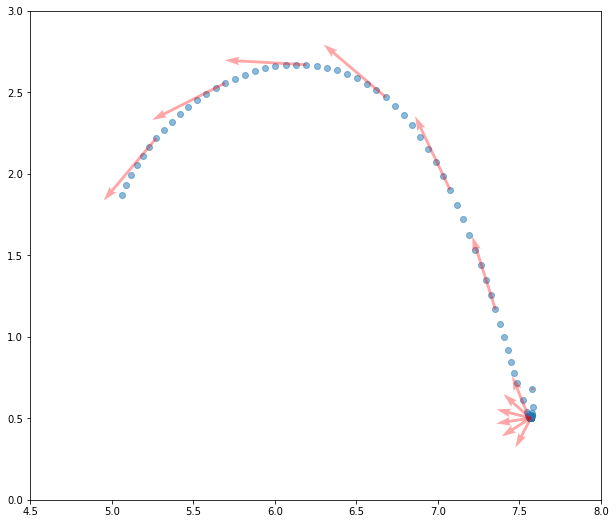

In [58]:
def plot_trajectory(name):
    trajectory_file = PATHS_DIR / Path(f"{name}.toml")
    trajectory_toml = {}
    with trajectory_file.open(mode="rb") as f:
        trajectory_toml = tomli.load(f)
    pose_toml = trajectory_toml["start_pose"]
    start_pose = Pose2d(pose_toml["x"], pose_toml["y"], Rotation2d.fromDegrees(pose_toml["angle"]))

    pose_toml = trajectory_toml["end_pose"]
    end_pose = Pose2d(pose_toml["x"], pose_toml["y"], Rotation2d.fromDegrees(pose_toml["angle"]))
    # end_pose = Pose2d(pose_toml["x"], pose_toml["y"], Rotation2d.fromDegrees(200))

    waypoints = []
    for point in trajectory_toml["internal_points"]:
        waypoints.append(Translation2d(point["x"], point["y"]))

    trajectory_config = TrajectoryConfig(trajectory_toml["max_velocity"], trajectory_toml["max_acceleration"])
    trajectory_config.setReversed(trajectory_toml["is_reversed"])
    trajectory_config.setStartVelocity(trajectory_toml["start_velocity"])
    trajectory_config.setEndVelocity(trajectory_toml["end_velocity"])

    target_yaw = Rotation2d.fromDegrees(trajectory_toml["target_yaw"])

    trajectory = TrajectoryGenerator.generateTrajectory(start_pose, waypoints, end_pose, trajectory_config)
  
    sampled_states = []
    states = trajectory.states()
    for i in range(0, len(states), 8):
        sampled_states.append(states[i])

    fig, ax = plt.subplots()
    plt.xlim(4.5, 8)
    plt.ylim(0, 3)
    ax.scatter(
        [s.pose.X() for s in trajectory.states()],
        [s.pose.Y() for s in trajectory.states()],
        alpha=0.5,
    )

    ax.quiver(
            [s.pose.X() for s in sampled_states],
            [s.pose.Y() for s in sampled_states],
            [s.velocity * s.pose.rotation().cos() for s in sampled_states],
            [s.velocity * s.pose.rotation().sin() for s in sampled_states],
            angles="xy",
            scale_units="xy",
            scale=4,
            color='r',
            width=0.005,
            alpha=0.35
        )
    ax.set_aspect("equal", "box")
    plt.savefig("trajectory.png")
    plt.show()
    
plot_trajectory("RightCargo2Collect")

In [59]:
# trajectories = ["RightCargo1Collect", "RightCargo2Collect",  "RightCargo3Collect"]
# for traj in trajectories:
#     plot_trajectory(traj)
#     plt.show()